# <center> EDA + Satisfaction Prediction + Reviews NLP + RFM Analysis + Deployment

## Table of Contents
1.0 Introduction

2.0 Data loading

3.0 Data Cleaning

        3.1 Merging ALL Dataframes

        3.2 Handling Missing Values

        3.3 Drop Duplicates

        3.4 Feature Engineering

4.0 Exploratory Data Analysis (EDA)

        6.1 Univariate Analysis

        6.2 Multivariate Analysis
    
5.0 - Data preprocesing

        6.1 Data encoding

        6.2 Feature scaling

        6.3 Handle imbalance
        
6.0 - Modeling

        6.1 Apply ML models

        6.2 Hyperparameter Tuning
        
7.0 - Pipeline

8.0 - NLP For Customer Satisfaction

9.0 - Customer Segmentation

        9.1 Customer Segmentation by RFM Analysis

        9.2 Customer Segmentation by K-Means

10.0 - Model Deployment (Classification & Clustering)

11.0 - Wrap up & Conclusion

# 1.0 Introduction
## This project is about "Olist", a Brazilian ecommerce store which has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil where its features allow viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

# 2.0 Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

### Read All Files

In [2]:
customers_df= pd.read_csv('olist_customers_dataset.csv')
geolocation_df= pd.read_csv('olist_geolocation_dataset.csv')
items_df= pd.read_csv('olist_order_items_dataset.csv')
payments_df= pd.read_csv('olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('olist_orders_dataset.csv')
products_df= pd.read_csv('olist_products_dataset.csv')
sellers_df= pd.read_csv('olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('product_category_name_translation.csv')

### "Customers" Dataset

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### "Geolocation" Dataset

In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### "Order items" Dataset

In [5]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### "Order Payments" Dataset

In [6]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### "Order Reviews" Dataset

In [7]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### "Orders" Dataset

In [8]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### "Products" Dataset

In [9]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### "Sellers" Dataset

In [10]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### "Product Category Name Translation" Dataset

In [11]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# 3.0 Data Cleaning

### 3.1 Merging All Dataframes

In [12]:
df= pd.merge(customers_df, orders_df, on="customer_id", how='inner')
df= df.merge(reviews_df, on="order_id", how='inner')
df= df.merge(items_df, on="order_id", how='inner')
df= df.merge(products_df, on="product_id", how='inner')
df= df.merge(payments_df, on="order_id", how='inner')
df= df.merge(sellers_df, on='seller_id', how='inner')
df= df.merge(category_translation_df, on='product_category_name', how='inner')
df.shape

(115609, 40)

In [14]:
df.to_parquet("olist_final.parquet")

### Show All Features

In [ ]:
df.columns

#### Check duplicates

In [ ]:
df.duplicated().sum()

In [15]:
df.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [19]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [ ]:
df.info()

### 3.2 Handling Missing Values

In [20]:
# Number of Missing Values for the first half of features

df.isna().sum()[:20]

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
dtype: int64

##### Drop All Missing Values in datetime columns

In [21]:
df.dropna(subset= ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

##### Keep " review_comment_message " & " review_comment_title "  Features ( Will be handled later )

In [22]:
# Number of Missing Values for the Second half of features

df.isna().sum()[20:]

seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name_english    0
dtype: int64

##### Check the missing values

In [23]:
df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']][df.product_weight_g.isna()]

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
27352,NaN,NaN,NaN,NaN


In [24]:
# Since all the missing values are in the same raw, we will drop this raw
df.drop(27352, inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True)

### 3.3 Feature Engineering

##### Classify Products Categories (71) into 9 main Categories

In [25]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify_cat)

In [26]:
df.product_category.value_counts()

product_category
Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: count, dtype: int64

##### Combine Width, Height and Length to get Product Volume

In [27]:
# Create Volume Column
df['product_vol_cm3'] = df.product_length_cm * df.product_width_cm * df.product_height_cm

# Drop Width, Height and Length
df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis= 1, inplace= True)

#### Convert Datetime features from Object to Datetime

In [28]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] =pd.to_datetime(df['order_delivered_carrier_date'])

##### Extract duration of estimated shipping from purchasing date untill estimated delivery date

In [29]:
# Assuming 'order_estimated_delivery_date' and 'order_purchase_timestamp' have been converted to datetime
df['estimated_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

##### Extract duration of shipping from purchasing date until delivered to customer date

In [30]:
df['arrival_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

##### Extract duration of shipping from purchasing carrier delivered date untill delivered to customer

In [31]:
# Assuming 'order_delivered_customer_date' and 'order_delivered_carrier_date' are already converted to datetime format
df['shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

##### Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"

In [32]:
df.drop((df[['order_delivered_carrier_date', 'order_delivered_customer_date']][df.shipping_days < 0]).index, inplace= True)

##### Shipping status from Seller to Carrier

In [33]:
# Ensure the columns are in datetime format
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])

# Calculate the seller to carrier duration in days correctly
df['seller_to_carrier_status'] = (df['shipping_limit_date'] - df['order_delivered_carrier_date']).dt.days

# Classify the duration into 'OnTime/Early' & 'Late'
df['seller_to_carrier_status'] = df['seller_to_carrier_status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')



##### Shipping status from Carrier to Customer

In [34]:
# Assuming 'order_estimated_delivery_date' and 'order_delivered_customer_date' are already converted to datetime

# Calculate the difference in days directly without converting to date
df['arrival_status'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days

# Classify the arrival status
df['arrival_status'] = df['arrival_status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')


#### Show statistics of new Features

In [35]:
df[['estimated_days', 'arrival_days', 'shipping_days']].describe()

,estimated_days,arrival_days,shipping_days
count,113135.000000,113135.000000,113135.000000
mean,23.469855,11.979626,8.721280
std,8.825454,9.362979,8.537984
min,2.000000,0.000000,0.000000
25%,18.000000,6.000000,4.000000
50%,23.000000,10.000000,7.000000
75%,28.000000,15.000000,11.000000
max,155.000000,208.000000,205.000000


#### Remove Outliers in both features ( More than 60 days )

In [36]:
outlier_indices = df[(df.estimated_days > 60) | (df.arrival_days > 60) | (df.shipping_days > 60)].index

df.drop(outlier_indices, inplace= True)
df.reset_index(inplace= True, drop= True)

##### Rating estimated delivery time

In [37]:
def rates(x):

    if x in range(0, 8):
        return 'Very Fast'
    
    elif x in range(8, 16):
        return 'Fast'
    
    elif x in range(16, 25):
        return 'Neutral'
    
    elif x in range(25, 40):
        return 'Slow'
    
    else:
        return 'Very Slow'

df['estimated_delivery_rate'] = df.estimated_days.apply(rates)

df['arrival_delivery_rate'] = df.arrival_days.apply(rates)

df['shipping_delivery_rate'] = df.shipping_days.apply(rates)

In [38]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category,product_vol_cm3,estimated_days,arrival_days,shipping_days,seller_to_carrier_status,arrival_status,estimated_delivery_rate,arrival_delivery_rate,shipping_delivery_rate
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,Furniture,107136.0,19,8,1,Late,OnTime/Early,Neutral,Fast,Very Fast
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,Furniture,107136.0,39,18,5,OnTime/Early,OnTime/Early,Slow,Neutral,Very Fast
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,Furniture,107136.0,39,18,5,OnTime/Early,OnTime/Early,Slow,Neutral,Very Fast
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,Furniture,107136.0,35,18,6,OnTime/Early,OnTime/Early,Slow,Neutral,Very Fast
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,Furniture,107136.0,46,25,9,Late,OnTime/Early,Very Slow,Slow,Fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112562,e548277911829ffe81aac2b4407de701,a0abd26659c9914690cbd3320d39fd96,92412,canoas,RS,a5f8439f1e560659a492608e370ecde2,delivered,2017-05-27 14:03:20,2017-05-27 14:15:16,2017-05-29 09:30:43,...,Home & Garden,45375.0,24,6,4,OnTime/Early,OnTime/Early,Neutral,Very Fast,Very Fast
112563,0fbd856ba1d4961786fb54bd448eb7fe,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,937592924b66482b823ee7ecd185d0ff,delivered,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,...,Home & Garden,74949.0,17,6,4,OnTime/Early,OnTime/Early,Neutral,Very Fast,Very Fast
112564,aa0533eb31ed3be79086f11bb2bec430,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,e22a3e8048469ea68906f666d446c25c,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,...,Home & Garden,15120.0,21,8,7,OnTime/Early,OnTime/Early,Neutral,Fast,Very Fast
112565,d11524bb77c28efad04e4467eac8a660,6968d41eb700f1ea39424e04b854bf7e,30130,belo horizonte,MG,1ce0acf125f1bcd636276dd213363196,delivered,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,...,Home & Garden,23800.0,27,9,7,OnTime/Early,OnTime/Early,Slow,Fast,Very Fast


In [39]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'product_category',
       'product_vol_cm3', 'estimated_days', 'arrival_days', 'shipping_days',
       'seller_to_carrier

In [40]:
df.to_parquet("olist_final.parquet")

# 4.0 Exploratory Data Analysis ( EDA ) 

### 4.1 Univariate Analysis

##### Top 10 Customers Capacity Cities

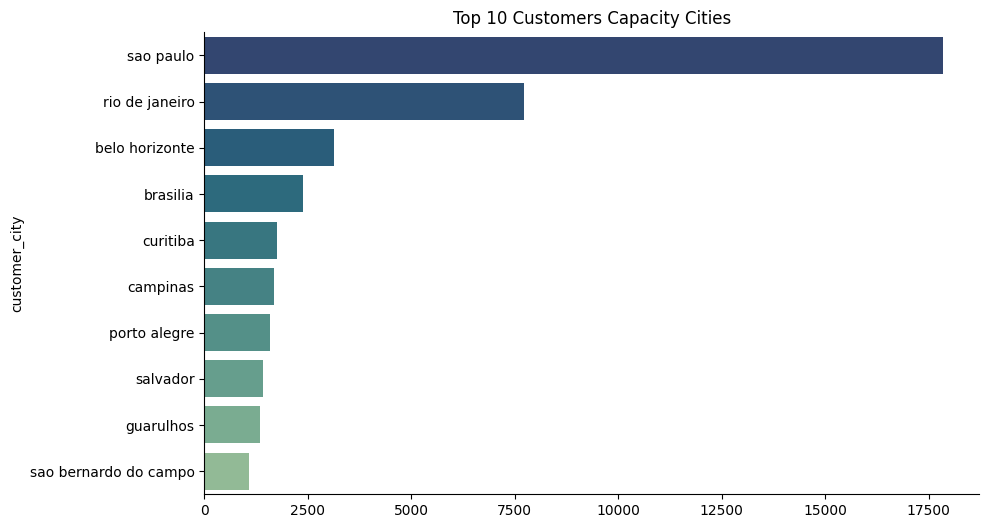

In [41]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_city.value_counts().values[:10], y = df.customer_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity Cities')
sns.despine()

##### Top 10 Customers Capacity States

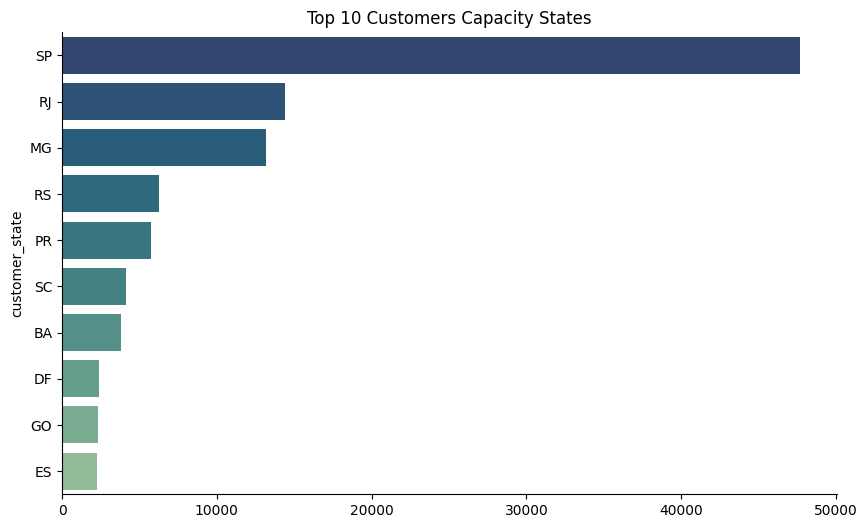

In [42]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.customer_state.value_counts().values[:10], y = df.customer_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity States')
sns.despine()

##### "Order_Status"

In [ ]:
df.order_status.value_counts()

#### Due to the Extreme imbalance and lack of variance in the feature, we should drop it

In [ ]:
df.drop('order_status', axis=1, inplace=True)

##### " Review_Score "

In [ ]:
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in df.review_score.value_counts().index]
sns.barplot(x = review_score_index, y= df.review_score.value_counts().values, palette= 'crest_r')
plt.title('Review Scores')
sns.despine()

##### " Price " 

In [ ]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.price)
plt.title('Price Distribution')
sns.despine()

##### " Freight Value " 

In [ ]:
plt.figure(figsize=[10, 6])
sns.set_palette('crest_r')
sns.distplot(x = df.freight_value)
plt.title('Freight Value Distribution')
sns.despine()

##### " Number of orders per each Category " 

In [ ]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.product_category.value_counts().values, y = df.product_category.value_counts().index, palette= 'crest_r')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

##### " Product Name Length " 

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_name_lenght)
plt.title('Product Name Length')
df.product_category.value_counts().values

##### " Product Description Length " 

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_description_lenght)
plt.title('Product Describtion Length')
sns.despine()

##### " Product Photos Quantity " 

In [ ]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df.product_photos_qty, palette= 'crest_r')
plt.title('Product Photos Quantity')
sns.despine()

##### " Product Weight "

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_weight_g)
plt.title('Product Weight')
sns.despine()

##### " Product Volume "

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.product_vol_cm3)
plt.title('Product Volume')
sns.despine()

##### " Payment Type "

In [ ]:
plt.figure(figsize=[10, 10])
plt.pie(df.payment_type.value_counts().values, explode=(0.05, 0.05, 0.05, 0.05), labels= df.payment_type.value_counts().index, autopct='%1.1f%%',shadow=True, startangle=90);

##### " Payment Installments "

In [ ]:
df.payment_installments.value_counts()

In [ ]:
df[df.payment_installments == 0]

##### Since no of installments can't be 0, we should drop these raws

In [ ]:
# Drop indices
df.drop([29113, 29114, 96733], inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True) 

In [ ]:
plt.figure(figsize=[10, 6])
sns.countplot(x = df.payment_installments, palette= 'crest_r')
plt.title('Installments Distribution')
sns.despine()

##### " Payment Value "

In [ ]:
plt.figure(figsize=[10, 6])
sns.distplot(x = df.payment_value)
plt.title('Payment Value')
sns.despine()

##### " Top 10 Cities for Sellers "

In [ ]:
plt.figure(figsize=[10, 6])
sns.barplot(x = df.seller_city.value_counts().values[:10], y= df.seller_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers Cities')
sns.despine()

##### " Top 10 Sellers Capacity States  "

In [ ]:
plt.figure(figsize=[15, 8])
sns.barplot(x = df.seller_state.value_counts().values[:10], y= df.seller_state.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Sellers States')
sns.despine()

### 4.2 Multivariate Analysis

### Which Cities have highest Revenue ?

In [ ]:
# Group customer city by payment value
revenue_per_city = df.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)

# plot Top 10 cities with highest revenue
plt.figure(figsize=[15, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'crest_r')
plt.title('Top 10 Cities with highest Revenue', fontsize= 15)
plt.xlabel('Customer City', fontsize= 12)
plt.ylabel('Total Payments in Millions',fontsize= 12)
sns.despine()

### What is the average review score for each product category ?

In [ ]:
# Filter product category with 4.5 or above
review_per_cat = df.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)

# Plot Product Category vs Review Score
plt.figure(figsize=[15, 8])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'crest_r')
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Prodcut Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### Are customers more likely to make larger payments using certain payment methods ?

In [ ]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
sns.despine()

In [ ]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].mean().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[15, 8])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Average payment value per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Average Payment Value', fontsize= 12)
sns.despine()

### What is the average freight value for each product category ?

In [ ]:
# Group product category by average freight value
freight_per_cat = df.groupby('product_category')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'crest_r')
plt.title('Average Freight Value per Product Category', fontsize= 15)
plt.xlabel('Average Freight Value',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### What is the average shipping time for each product Category ?

In [ ]:
# Group product category by average arrival time
ship_per_cat = df.groupby('product_category')[['arrival_days']].mean().sort_values(by='arrival_days', ascending=False)
ship_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[15, 8])
sns.barplot(x = ship_per_cat.arrival_days, y=  ship_per_cat.product_category, palette= 'crest_r')
plt.title('Average arrival Time per Product Category', fontsize= 15)
plt.xlabel('Average arrival time (days)',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### Are Transactions done with Vouchers lead to high review score ?

In [ ]:
plt.figure(figsize=[15, 8])
voucher_trans = df[df.payment_type == 'voucher']
sns.countplot(x= voucher_trans.review_score)

### How accurate are the estimated delivery dates provided to customers ?

In [ ]:
plt.figure(figsize=[30,8])
Values = df.arrival_status.value_counts().values
Labels = df.arrival_status.value_counts().index
plt.pie(Values, explode=(0.05, 0.05), labels= ['OnTime/Early', 'Late'], autopct='%1.1f%%', shadow=True, colors= ('#0000FF', '#C0C0C0'));

### Distribution of products categories by location ?

In [ ]:
plt.figure(figsize=[15, 8])
sns.scatterplot(x = geolocation_df.geolocation_lng, y = geolocation_df.geolocation_lat, hue= df.product_category)
plt.title('Distribution Of Categories by location', fontsize= 15)
plt.xlabel('Longitude',fontsize= 12)
plt.ylabel('Latitude', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);sns.despine()

In [ ]:
# Create copy of DataFrame
df_2 = df.copy()

# Save sample for EDA Deployment
EDA_df = df_2.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'order_id', 'review_id', 'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'product_category_name'], axis= 1)
EDA_sample = EDA_df.sample(frac= 1)[:10000]
EDA_sample.to_csv('EDA.csv')

# 5.0 Data Preprocessing

### 5.1 Drop Unneccessary Features

In [ ]:
# Drop all ids, zip codes, datetimes, review comment and title, product length

df.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
        'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
        'order_item_id', 'product_id', 'seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'shipping_limit_date', 'product_category_name',
        'product_category_name_english', 'product_category', 'product_weight_g', 'product_name_lenght',
        'product_vol_cm3'], axis= 1, inplace= True)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
# Calculate the frequency of each payment type in the actual DataFrame
payment_type_frequency = df['payment_type'].value_counts()

# Display the frequency of each payment type
print(payment_type_frequency)

In [ ]:
# Show Correlation between Features

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Show Correlation between Features
plt.figure(figsize=[10, 6])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Remove features with high correlations
df.drop(['arrival_days', 'shipping_days'], axis= 1, inplace= True)

In [ ]:
df.head()

#### Convert Review Score from Multiclass to Binary

In [ ]:
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

df['review_score'] = df['review_score'].map(encoded_class)

#### Split Data into Input Features & Target Variable

In [ ]:
X = df.drop('review_score', axis=1)
y = df['review_score']

### 5.2 Handling Categorical Features

#### Handling Ordinal Features ( Label Encoding)

In [ ]:
labels = {'Very Slow' : 1, 
          'Slow' : 2, 
          'Neutral' : 3, 
          'Fast' : 4, 
          'Very Fast' : 5}

X.estimated_delivery_rate = X.estimated_delivery_rate.map(labels)
X.shipping_delivery_rate = X.shipping_delivery_rate.map(labels)
X.arrival_delivery_rate = X.arrival_delivery_rate.map(labels)

#### Handling Nominal Features ( One Hot Encoding )

In [ ]:
X = pd.get_dummies(X, drop_first=True)

#### Split Data into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)

### 5.3 Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 'all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

##### Plotting Featres as per importance

In [ ]:
# Get the indices sorted by most important to least important
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(fs.feature_names_in_[indices[i]])

# Now plot
sns.barplot(x = fs.scores_[indices[range(15)]], y = features)

#### Select best 9 Features

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 9)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [ ]:
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

### 5.4 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

##### Convert Array to Dataframe

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

### 5.5 Handling Imbalance

##### Check imbalance percentage

In [ ]:
round((y_train.value_counts() / y_train.shape[0]) * 100, 2)

##### Use SMOTE for handling imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# 6.0 Modeling

### 6.1 Apply ML Models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lr.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lr.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(lr, x_train_resampled, y_train_resampled)
ConfusionMatrixDisplay.from_estimator(lr, x_test_scaled, y_test)

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, knn.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, knn.predict(x_test_scaled)))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# For the training set
ConfusionMatrixDisplay.from_estimator(knn, x_train_resampled, y_train_resampled)
ConfusionMatrixDisplay.from_predictions(y_train_resampled, knn.predict(x_train_resampled))

# For the testing set
ConfusionMatrixDisplay.from_estimator(knn, x_test_scaled, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, knn.predict(x_test_scaled))


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming x_train_resampled, y_train_resampled, x_test_scaled, y_test are already defined

dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, dt.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, dt.predict(x_test_scaled)))

# Plotting the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(dt, x_train_resampled, y_train_resampled)
# Plotting the confusion matrix for the testing set
ConfusionMatrixDisplay.from_estimator(dt, x_test_scaled, y_test)

### Random Forest

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Assuming x_train_resampled, y_train_resampled, x_test_scaled, and y_test are already defined

rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, rf.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, rf.predict(x_test_scaled)))

# Plotting the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(rf, x_train_resampled, y_train_resampled, display_labels=['Not Satisfied', 'Satisfied'])

# Plotting the confusion matrix for the testing set
ConfusionMatrixDisplay.from_estimator(rf, x_test_scaled, y_test, display_labels=['Not Satisfied', 'Satisfied'])



### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Assuming x_train_resampled, y_train_resampled, x_test_scaled, and y_test are already defined

ad = AdaBoostClassifier(algorithm='SAMME')
ad.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, ad.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, ad.predict(x_test_scaled)))

# Plotting the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(ad, x_train_resampled, y_train_resampled, display_labels=['Not Satisfied', 'Satisfied'])

# Plotting the confusion matrix for the testing set
ConfusionMatrixDisplay.from_estimator(ad, x_test_scaled, y_test, display_labels=['Not Satisfied', 'Satisfied'])


### XGboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Assuming x_train_resampled, y_train_resampled, x_test_scaled, and y_test are defined

le = LabelEncoder()
y_train_xg = le.fit_transform(y_train_resampled)
y_test_xg = le.fit_transform(y_test)

xg = XGBClassifier()
xg.fit(x_train_resampled, y_train_xg)

print('Evaluation on Training \n', classification_report(y_train_xg, xg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, xg.predict(x_test_scaled)))

# Plotting the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(xg, x_train_resampled, y_train_xg, display_labels=le.classes_)

# Plotting the confusion matrix for the testing set
ConfusionMatrixDisplay.from_estimator(xg, x_test_scaled, y_test_xg, display_labels=le.classes_)


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

nb = GaussianNB()
nb.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, nb.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test_scaled)))

# Plotting the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(nb, x_train_resampled, y_train_resampled, display_labels=np.unique(y_train_resampled))

# Plotting the confusion matrix for the testing set
ConfusionMatrixDisplay.from_estimator(nb, x_test_scaled, y_test, display_labels=np.unique(y_test))


### LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

lg = lgb.LGBMClassifier()
lg.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lg.predict(x_test_scaled)))

# Plotting the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(lg, x_train_resampled, y_train_resampled, display_labels=np.unique(y_train_resampled))

# Plotting the confusion matrix for the testing set
ConfusionMatrixDisplay.from_estimator(lg, x_test_scaled, y_test, display_labels=np.unique(y_test))


In [ ]:
! pip install catboost

### CatBoost

In [ ]:
import catboost as cb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

# Initialize and fit the CatBoostClassifier
cb_model = cb.CatBoostClassifier(verbose=0)  # Set verbose to 0 to reduce logging
cb_model.fit(x_train_resampled, y_train_resampled)

# Evaluation
print('Evaluation on Training \n', classification_report(y_train_resampled, cb_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, cb_model.predict(x_test_scaled)))

# Plotting the confusion matrix for the training set
ConfusionMatrixDisplay.from_estimator(cb_model, x_train_resampled, y_train_resampled, display_labels=np.unique(y_train_resampled))

# Plotting the confusion matrix for the testing set
ConfusionMatrixDisplay.from_estimator(cb_model, x_test_scaled, y_test, display_labels=np.unique(y_test))


### 6.2 Hyperparameter Tuning

#### XGboost

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 7, 8],
    'n_estimators': [100, 200] 
    }
grid_search = GridSearchCV(xg, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
grid_search.fit(x_train_resampled, y_train_xg)

In [ ]:
final_xg_model = XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200)
final_xg_model.fit(x_train_resampled, y_train_xg)

print('Evaluation on Training \n', classification_report(y_train_xg, final_xg_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, final_xg_model.predict(x_test_scaled)))

In [ ]:
import catboost as cb
from sklearn.model_selection import GridSearchCV

# Initialize a CatBoostClassifier instance
cb_model = cb.CatBoostClassifier(verbose=0)  # Set verbose to 0 to minimize output during grid search

param_grid = {
    'learning_rate': [0.1, 0.2],
    'depth': [5, 7, 8],
    'iterations': [100, 200]
}

# Initialize GridSearchCV with the CatBoostClassifier instance
grid_search = GridSearchCV(cb_model, param_grid=param_grid, cv=5, scoring='f1_macro')

# Fit GridSearchCV
grid_search.fit(x_train_resampled, y_train_resampled)

# Print best parameters
print(grid_search.best_params_)


In [ ]:
import catboost as cb
final_cb_model = cb.CatBoostClassifier(depth= 7, iterations= 200, learning_rate= 0.2)
final_cb_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_cb_model.predict(x_train_resampled)))
print('Evaluation on Training \n', classification_report(y_test, final_cb_model.predict(x_test_scaled)))

#### RandomForest

In [ ]:
param_grid = {
    'max_depth': [8, 9, 10],
    'n_estimators': [100, 200]
    }
grid_search = GridSearchCV(rf, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
grid_search.fit(x_train_resampled, y_train_resampled)
grid_search.best_params_

In [ ]:
final_rf_model = RandomForestClassifier(n_estimators= 200, max_depth= 10)
final_rf_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_rf_model.predict(x_train_resampled)))
print('Evaluation on Training \n', classification_report(y_test, final_rf_model.predict(x_test_scaled)))

#### Select XGboost for pipeline as it provides highest performance on testing

# 7.0 Pipeline

In [ ]:
df_pipeline = df.copy()
df_pipeline.head()

#### Encoding Review score to 0 and 1

In [ ]:
encoded_class = { 'Not Satisfied' : 0,
                  'Satisfied' : 1,
                }

df_pipeline['review_score'] = df_pipeline['review_score'].map(encoded_class)

### Split Input Features and Targe Variable

In [ ]:
X = df_pipeline.drop('review_score', axis=1)
y = df_pipeline['review_score']

### Split into Train & Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

### Prepare Numerical Features

In [ ]:
numeric_columns = x_train.select_dtypes(exclude = 'object').columns
numeric_columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'median')), 
                                    ('Feature Scaling', StandardScaler(with_mean=False))])

### Prepare Categorical Features

In [ ]:
cat_columns = x_train.select_dtypes(include = 'object').columns
cat_columns

In [ ]:
cat_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'most_frequent')),
                                ('OneHot Encoding', OneHotEncoder(drop= 'first')),
                                ('Feature Scaling', StandardScaler(with_mean= False))])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[('Numerical Columns', numerical_pipeline, numeric_columns),
                                                ('Cat Columns', cat_pipeline, cat_columns)], remainder= 'passthrough')
preprocessing

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

final_pipeline = Pipeline(steps=[('Preprocessing', preprocessing), ('Smote', SMOTE()), 
                                ('Model', XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200))])
final_pipeline

In [ ]:
final_pipeline.fit(x_train, y_train)

In [ ]:
import joblib
joblib.dump(final_pipeline, 'Brazilian Ecommerce Classification.bkl')

# 8.0 NLP For Customer Satisfaction

In [ ]:
reviews_df.head()

In [ ]:
# Remove 'review_comment_title' because of high missing values perentage and remove other features for unneccessity
reviews_df = reviews_df[['review_comment_message', 'review_score']]

reviews_df.info()

In [ ]:
# Drop missing values
reviews_df.dropna(inplace= True)

# Rename columns for ease
reviews_df.rename(columns = {'review_comment_message' : 'comment', 'review_score' : 'score'}, inplace= True)

# Reset index
reviews_df.reset_index(inplace= True, drop= True)

In [ ]:
# Encode scores to be Satisfied or Not Satisfied
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

reviews_df['score'] = reviews_df['score'].map(encoded_class)

#### Text Cleaning & Processing

In [ ]:
import ssl
import nltk

# Attempt to disable SSL certificate verification (use with caution)
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import nltk
nltk.download('stopwords')
import pandas as pd

stemmer = PorterStemmer()
corpus = []

for i in range(reviews_df.shape[0]):
    # Remove any special characters or number
    comment = re.sub('[^a-zA-Z]', ' ', reviews_df.comment[i])
    # Lower text
    comment = comment.lower()
    # Remove any spaces before or after text
    comment = comment.strip()
    # Split text for stemming
    comment = comment.split()
    # Stemming words in Portugues
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    # Merge stemmed words to be sentences
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TFIDF Vectorizer to convert text into numbers
tf = TfidfVectorizer()
df_new = tf.fit_transform(corpus).toarray()

In [ ]:
df_new = pd.DataFrame(df_new, columns= tf.get_feature_names_out())
df_new

#### Split into Input Features & Target Variable

In [ ]:
X = df_new
y = reviews_df['score']

#### Split data into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create a MultinomialNB classifier
nb = MultinomialNB()
nb.fit(x_train, y_train)  # Train the classifier
y_pred = nb.predict(x_test)  # Make predictions

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


##### Now we have a reliable model with better results for classifying customers based on reviews, Next we should investigate further reasons for non-satisfaction.

#### Check Reasons for Non-Satisfaction

In [ ]:
# Create a separate DataFrame to check reasons of non satisfaction 
non_satisfied = reviews_df[reviews_df.score == 'Not Satisfied']

# Reset index
non_satisfied.reset_index(inplace= True, drop= True)

#### Text Cleaning & Processing

In [ ]:
stemmer = PorterStemmer()
corpus = []

for i in range(non_satisfied.shape[0]):
    comment = re.sub('[^a-zA-Z]', ' ', non_satisfied.comment[i])
    comment = comment.lower()
    comment = comment.strip()
    comment = comment.split()
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

#### Translate sample of non-satisfied comments for comprehension

In [ ]:
# First install deep_translator library
#! python3 -m pip install deep_translator

In [ ]:
from deep_translator import GoogleTranslator
import random

non_satisfied_trans = []
random.seed(42)

for sentence in random.sample(corpus, 1000):
    non_satisfied_trans.append(GoogleTranslator(source='portuguese', target='english').translate(sentence))
    
non_satisfied_trans

In [ ]:
# Apply stemming to the translated text
non_satisfied_final = []

for sent in non_satisfied_trans:

    for word in sent.split():

        if word not in set(stopwords.words('english')):

            non_satisfied_final.append(stemmer.stem(word))

non_satisfied_final

In [ ]:
# Visualize most common words for non-satsifaction
from wordcloud import WordCloud

non_satisfied_final = ' '.join(non_satisfied_final)
non_satisfied_freq = WordCloud(width=1000, height=800, background_color='white').generate(non_satisfied_final)

plt.figure(figsize=(15, 10))
plt.imshow(non_satisfied_freq)
plt.axis("off")

In [ ]:
# Sort the word frequencies in descending order
non_satisfied_freq = non_satisfied_freq.process_text(non_satisfied_final)
sorted_word_frequencies = sorted(non_satisfied_freq.items(), key= lambda x : x[1], reverse=True)

In [ ]:
# Plot Words vs Frequency
plt.figure(figsize= [20, 10])
sns.barplot(x = pd.DataFrame(sorted_word_frequencies)[1:20][0], y= pd.DataFrame(sorted_word_frequencies)[1:20][1], palette= 'crest_r')
plt.title('Top 20 Words and their Frequinces', fontsize= 15)
plt.xlabel('Words', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
sns.despine()

#### From the study of non-satisfied customers reviews, we can see that majority of words mentioned are related to shipping issues.

# 9.0 Customer Segmentation

### 9.1 Customer Segmentation by RFM Analysis

In [ ]:
df_2.head()

In [ ]:
# Get last transaction date to help calculate Recency
max_trans_date = max(df_2.order_purchase_timestamp).date()
max_trans_date

#### Create Recency, Frequancy and Monetary Features

In [ ]:
from datetime import datetime

rfm_table = df_2.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'product_id': lambda x:len(x),
                                                             'payment_value': lambda x:sum(x)})
rfm_table

In [ ]:
# Rename columns
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','product_id':'Frequancy','payment_value':'Monetary'}, inplace=True)
rfm_table

#### Create Recency, Frequancy and Monetary scores

In [ ]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequancy'].rank(method= 'first'), 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])
rfm_table

In [ ]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x= 'Recency',y= 'Monetary', data=rfm_table)
plt.title('Recency vs Monetary', fontsize= 15)
sns.despine()

In [ ]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x='Frequancy', y='Monetary', data=rfm_table)
plt.title('Frequancy vs Monetary', fontsize= 15)
sns.despine()

#### Calculate RFM Score

In [ ]:
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table

#### Cluster customers based on RFM Score

In [ ]:
def customer_segmenation(rfm_score):
  
  if rfm_score == 444:
    return 'VIP'
  
  elif  rfm_score >= 433 and rfm_score < 444:
    return 'Very Loyal'
  
  elif   rfm_score >=421 and rfm_score< 433:
    return 'Potential Loyalist'
  
  elif rfm_score>=344 and rfm_score < 421:
    return 'New customers'
  
  elif rfm_score>=323 and rfm_score<344:
    return 'Potential customer'
  
  elif rfm_score>=224 and rfm_score<311:
    return 'High risk to churn' 
  
  else:
    return 'Lost customers'       
  
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmenation)

rfm_table

In [ ]:
# Plot frquency of each segment
plt.figure(figsize=[10,6])
sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'crest_r')
sns.despine()

### Check Outliers

In [ ]:
rfm_table.describe()

#### Recency

In [ ]:
sns.boxplot(x= rfm_table.Recency)
sns.stripplot(x = rfm_table.Recency, color= 'black')

#### Frequancy

In [ ]:
sns.boxplot(x= rfm_table.Frequancy)
sns.stripplot(x = rfm_table.Frequancy, color= 'black')

#### Monetary

In [ ]:
sns.boxplot(x= rfm_table.Monetary)
sns.stripplot(x = rfm_table.Monetary, color= 'black')

#### Remove Extreme 5% of Outliers

In [ ]:
print('Recency 5% Outliers Limits:', np.percentile(rfm_table.Recency, 5), np.percentile(rfm_table.Recency, 95))
print('Frequancy 5% Outliers Limits:', np.percentile(rfm_table.Frequancy, 5), np.percentile(rfm_table.Frequancy, 95))
print('Monetary 5% Outliers Limits:', np.percentile(rfm_table.Monetary, 5), np.percentile(rfm_table.Monetary, 95))

#### Remove Outliers for Recency & Monetary (Extreme 5%)

In [ ]:
for i in [0, 2]:

    outlier_indices = []
    col = rfm_table.columns[i]
    percentile_5 = np.percentile(rfm_table[col], 5)
    percentile_95 = np.percentile(rfm_table[col], 95)
    outlier_indices.append(rfm_table[(rfm_table[col] < percentile_5) | (rfm_table[col] > percentile_95)].index)

rfm_table.drop(outlier_indices[0][:], inplace= True)
rfm_table.reset_index(inplace= True, drop= True)

In [ ]:
#pip install squarify

#### Customer Segmentation Grid

In [ ]:
import squarify

plt.figure(figsize=[15,8])
plt.rc('font', size=15)

Sizes = rfm_table.groupby('customer_segmentation')[['Monetary']].count()
squarify.plot(sizes= Sizes.values, label= Sizes.index, color=["red", "orange", "blue", "yellow", "fuchsia", "green", "royalblue"], alpha=.55)
plt.suptitle("Customer Segmentation Grid", fontsize=25);

#### Recency & Monetary Plot

In [ ]:
plt.figure(figsize= [15, 8])
colors = ['purple', 'green', 'red', 'blue', 'orange', 'royalblue', 'yellow']
sns.scatterplot(x= rfm_table.Recency, y= rfm_table.Monetary, hue= rfm_table.customer_segmentation, palette= colors)
plt.legend(prop={'size':10})
sns.despine()

### Check Skeweness

In [ ]:
# Recency
sns.distplot(x= rfm_table.Recency)

In [ ]:
# Frequancy
sns.distplot(x= rfm_table.Frequancy)

In [ ]:
# Monetary
sns.distplot(x= rfm_table.Monetary)

#### Apply Log function to handle skeweness for Frequancy & Monetary

In [ ]:
for i in ['Frequancy', 'Monetary']:
    rfm_table[i] = np.log10(rfm_table[i])

In [ ]:
# Frequancy
sns.distplot(x= rfm_table.Frequancy)

In [ ]:
# Monetary
sns.distplot(x= rfm_table.Monetary)

### 9.2 Clustering with K-means

In [ ]:
df_cluster = df_2[['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']]
df_cluster

### Take sample from data (10k)

In [ ]:
df_sample = df_cluster.sample(frac= 1, random_state= 42)[:10000]

#### Save sample as CSV for deployment

In [ ]:
df_sample.to_csv('Clustering Sample.csv')

In [ ]:
df_sample.describe()

#### Drop freight values with zeros

In [ ]:
df_sample.drop(df_sample[df_sample.freight_value == 0].index, inplace= True)
df_sample.reset_index(inplace= True, drop= True)

#### Take copy for Pipeline

In [ ]:
cluster_pipeline = df_sample.copy()

In [ ]:
for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
    df_sample[i] = np.log10(df_sample[i])

### Feature Scaling

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming df_sample is your DataFrame

# Replace inf/-inf with NaN
df_sample.replace([np.inf, -np.inf], np.nan, inplace=True)

# Use SimpleImputer from scikit-learn for imputation
# This example uses the mean strategy but you can choose 'median', 'most_frequent', or 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to your DataFrame
df_sample_imputed = pd.DataFrame(imputer.fit_transform(df_sample), columns=df_sample.columns)

In [ ]:
# Drop rows where freight_value is 0 and reset index
df_sample.drop(df_sample[df_sample.freight_value == 0].index, inplace=True)
df_sample.reset_index(drop=True, inplace=True)

# Apply log transformation to selected columns
for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
    df_sample[i] = np.log10(df_sample[i] + 1)  # Adding 1 to avoid log(0)

# Replace inf/-inf with NaN (if any left after log transformation)
df_sample.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_sample_imputed = pd.DataFrame(imputer.fit_transform(df_sample), columns=df_sample.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)
data_scaled = sc.fit_transform(df_sample_imputed)

#### Detecting number of clusters uning Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
scores = []

for i in range(2,10):
  kmean = KMeans(n_clusters=i)
  y_pred_kmean = kmean.fit_predict(data_scaled)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(data_scaled,y_pred_kmean))

plt.plot(range(2,10),wcss)
plt.title('number of cluster vs WCSS')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')

#### Detecting number of clusters using Silhouete Score

In [ ]:
plt.plot(range(2,10),scores)
plt.title('number of cluster vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

#### Select number of clusters k= 3

In [ ]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters= 3)
y_pred_kmean = kmean.fit_predict(data_scaled)

In [ ]:
# Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

In [ ]:
# Ensure original_cluster_sample matches the data used to generate y_pred_kmean
original_cluster_sample = df_cluster.sample(frac=1, random_state=42)

# Generate y_pred_kmean for the subset if not done already
# Assuming `kmean` is your KMeans model and original_cluster_sample is prepared
y_pred_kmean = kmean.predict(original_cluster_sample)

# Now, assign the cluster labels
original_cluster_sample['cluster_label'] = y_pred_kmean

In [ ]:
original_cluster_sample.head()

In [ ]:
original_cluster_sample.groupby('cluster_label').describe().T

In [ ]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= ['blue', 'orange', 'red'])

#### As we can see from statistics table and pairplot that clusters have high percentage of overlaping, sow RFM would be better in this case to cluster customers.

#### Show Kmeans Clusters

In [ ]:
y_pred_kmean = kmean.fit_predict(data_scaled)

In [ ]:
plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean == 0, 0], data_scaled[y_pred_kmean == 0, 1], c='red', label='Cluster 1')
plt.scatter(data_scaled[y_pred_kmean == 1, 0], data_scaled[y_pred_kmean == 1, 1], c='green', label='Cluster 2')
plt.scatter(data_scaled[y_pred_kmean == 2, 0], data_scaled[y_pred_kmean == 2, 1], c='blue', label='Cluster 3')
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='yellow', s=100, label='Centroids')
plt.title('Customers KMeans Clusters')
plt.legend()
plt.show()


#### Show Clusters using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(data_scaled)
pca.explained_variance_ratio_

In [ ]:
wcss = []
scores = []
for i in range(2,10):
  kmean = KMeans(n_clusters=i)
  y_pred = kmean.fit_predict(x_pca)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(x_pca,y_pred))
plt.plot(range(2,10),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')  

In [ ]:
plt.plot(range(2,10),scores)
plt.title('silhouette_score')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')

In [ ]:
kmean = KMeans(n_clusters=3)
y_pred_pca = kmean.fit_predict(x_pca)

In [ ]:
plt.figure(figsize=[10, 6])
plt.scatter(x_pca[y_pred_pca==0,0],x_pca[y_pred_pca==0,1],c = 'red',label = 'cluster1')
plt.scatter(x_pca[y_pred_pca==1,0],x_pca[y_pred_pca==1,1],c = 'green',label = 'cluster2')
plt.scatter(x_pca[y_pred_pca==2,0],x_pca[y_pred_pca==2,1],c = 'blue',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='yellow',s=100,label='Centroids')
plt.title('Customers Clusters with PCA')
plt.legend()
sns.despine()

## 9.3 Pipeline

#### Prepare Features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

numerical_pipeline_cluster = Pipeline(steps=[('Feature Scaling', StandardScaler(with_mean=False))])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing_cluster = ColumnTransformer(transformers= [('Numerical Columns', numerical_pipeline_cluster, cluster_pipeline.columns)], 
                                          remainder= 'passthrough')
preprocessing_cluster

In [ ]:
final_pipeline_cluster = Pipeline(steps=[('Preprocessing', preprocessing_cluster), ('Log Transformer', FunctionTransformer(np.log10)),
                                ('Model', KMeans(n_clusters= 3))])
final_pipeline_cluster

In [ ]:
# Fit pipeline to Dataframe
#final_pipeline_cluster.fit(cluster_pipeline)

In [ ]:
# Save model as bkl file
import joblib
joblib.dump(final_pipeline_cluster, 'Brazilian Ecommerce Clustering.bkl')

In [ ]:
final_pipeline_cluster

# 10.0 Model Deployment

In [ ]:
model_classification = joblib.load('Brazilian Ecommerce Classification.bkl')
model_clustering = joblib.load('Brazilian Ecommerce Clustering.bkl')

#### Test Classification Model

In [ ]:
model_classification.predict(pd.DataFrame({'freight_value' :[30], 'product_description_lenght' :[1000], 'product_photos_qty' :[4], 'payment_type' :['credit_card'], 'payment_installments' :[6], 'payment_value' :[1000], 'estimated_days' :[7], 'arrival_days' :[6], 'arrival_status' :['OnTime/Early'], 'seller_to_carrier_status' :['OnTime/Early'], 'estimated_delivery_rate' :['Very Fast'], 'arrival_delivery_rate' :['Very Fast'], 'shipping_delivery_rate' :['Very Fast']}))

#### Test Clustering Model

In [ ]:
model_clustering.predict(pd.DataFrame({'freight_value' :[10], 'price' :[90], 'payment_value' :[100], 'payment_installments' :[10], 'payment_sequential' :[3]}))

In [ ]:
# Install neccessary libraries for deployment

! pip install ydata_profiling
! pip install streamlit_pandas_profiling

### Deployment with Streamlit

In [ ]:
%%writefile Brazilian_Ecommerce_Project.py

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import streamlit as st
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport
from streamlit_pandas_profiling import st_profile_report

# Load Classification and Clustering Pipeline models
model_classification = joblib.load('Brazilian Ecommerce Classification.bkl')
model_clustering = joblib.load('Brazilian Ecommerce Clustering.bkl')

# Create Sidebar to navigate between EDA, Classification and Clustering
sidebar = st.sidebar
mode = sidebar.radio('Mode', ['EDA', 'Classification', 'Clustering'])
st.markdown("<h1 style='text-align: center; color: #ff0000;'></h1>", unsafe_allow_html=True)

if mode == "EDA":

    def main():

        # Header of Customer Satisfaction Prediction
        html_temp="""
                    <div style="background-color:#F5F5F5">
                    <h1 style="color:#31333F;text-align:center;"> Customer Satisfaction Prediction </h1>
                    </div>
                """
        # Create sidebar to upload CSV files
        with st.sidebar.header('Upload your CSV data'):
            uploaded_file = st.sidebar.file_uploader('Upload your input csv file')

        if uploaded_file is not None:
            # Read file and Put headers
            EDA_sample = pd.read_csv(uploaded_file, index_col= 0)
            pr = ProfileReport(EDA_sample, explorative=True)
            st.header('**Input DataFrame**')
            st.write(EDA_sample)
            st.write('---')
            st.header('**Pandas Profiling Report**')
            st_profile_report(pr)
        
        else:
            st.info('Awaiting for CSV file to be uploaded.')

    if __name__ == '__main__':
        main()

if mode == "Classification":

    # Define function to predict classification based on assigned features
    def predict_satisfaction(freight_value, product_description_lenght, product_photos_qty, payment_type, payment_installments, payment_value, 
    estimated_days, arrival_days, arrival_status, seller_to_carrier_status, estimated_delivery_rate, arrival_delivery_rate, shipping_delivery_rate):

        prediction_classification = model_classification.predict(pd.DataFrame({'freight_value' :[freight_value], 'product_description_lenght' :[product_description_lenght], 'product_photos_qty' :[product_photos_qty], 'payment_type' :[payment_type], 'payment_installments' :[payment_installments], 'payment_value' :[payment_value], 'estimated_days' :[estimated_days], 'arrival_days' :[arrival_days], 'arrival_status' :[arrival_status], 'seller_to_carrier_status' :[seller_to_carrier_status], 'estimated_delivery_rate' :[estimated_delivery_rate], 'arrival_delivery_rate' :[arrival_delivery_rate], 'shipping_delivery_rate' :[shipping_delivery_rate]}))
        return prediction_classification

    def main():

        # Header of Customer Satisfaction Prediction
        html_temp="""
                    <div style="background-color:#F5F5F5">
                    <h1 style="color:#31333F;text-align:center;"> Customer Satisfaction Prediction </h1>
                    </div>
                """
        st.markdown(html_temp,unsafe_allow_html=True)
        
        # Assign all features with desired data input method
        sidebar.title('Numerical Features')
        product_description_lenght = sidebar.slider('product_description_lenght', 4,3990,100)
        product_photos_qty = sidebar.slider('product_photos_qty', 1,20,1)
        payment_installments = sidebar.slider('payment_installments', 1,24,1)
        estimated_days = sidebar.slider('estimated_days', 3,60,1)
        arrival_days = sidebar.slider('arrival_days', 0,60,1)
        payment_type = st.selectbox('payment_type', ['credit_card', 'boleto', 'voucher', 'debit_card'])
        arrival_status = st.selectbox('arrival_status', ['OnTime/Early', 'Late'])
        seller_to_carrier_status = st.selectbox('seller_to_carrier_status', ['OnTime/Early', 'Late'])
        estimated_delivery_rate = st.selectbox('estimated_delivery_rate', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        arrival_delivery_rate = st.selectbox('arrival_delivery_rate', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        shipping_delivery_rate = st.selectbox('shipping_delivery_rate Date', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        payment_value = st.text_input('payment_value', '')
        freight_value = st.text_input('freight_value', '')
        result = ''

        # Predict Customer Satsifaction
        if st.button('Predict_Satisfaction'):
            result = predict_satisfaction(freight_value, product_description_lenght, product_photos_qty, payment_type, payment_installments, payment_value, 
                                        estimated_days, arrival_days, arrival_status, seller_to_carrier_status, estimated_delivery_rate, arrival_delivery_rate, shipping_delivery_rate)
                                        
        if result == 0:
            result = 'Not Satisfied'
            st.success(f'The Customer is {result}')
        else:
            result = 'Satisfied'
            st.success(f'The Customer is {result}')

    if __name__ == '__main__':
        main()

if mode == "Clustering":

    def predict_clustering(freight_value, price, payment_value, payment_installments, payment_sequential):

        prediction_clustering = model_clustering.predict(pd.DataFrame({'freight_value' :[freight_value], 'price' :[price], 'payment_installments' :[payment_installments], 'payment_value' :[payment_value], 'payment_sequential' :[payment_sequential]}))
        return prediction_clustering

    def main():

        # Header of Customer Segmentation
        html_temp="""
                <div style="background-color:#F5F5F5">
                <h1 style="color:#31333F;text-align:center;"> Customer Segmentation </h1>
                </div>
            """
        st.markdown(html_temp,unsafe_allow_html=True)

        # Assign all features with desired data input method
        payment_installments = st.slider('payment_installments', 1,24,1)
        payment_sequential = st.slider('payment_sequential', 1,24,1)
        freight_value = st.text_input('freight_value', '')
        price = st.text_input('price', '')
        payment_value = st.text_input('payment_value', '')
        result_cluster = ''

        # Predict Cluster of the customer
        if st.button('Predict_Cluster'):
            result_cluster = predict_clustering(freight_value, price, payment_value, payment_installments, payment_sequential)
                                        
        st.success(f'Customer Cluster is {result_cluster}')
        
        # Upload CSV file
        with st.sidebar.header('Upload your CSV data'):
            uploaded_file = st.sidebar.file_uploader('Upload your input csv file')

        if uploaded_file is not None:

            # Read dataset
            sample = pd.read_csv(uploaded_file, index_col= 0)
            
            # Define sidebar for clustering algorithm
            selected_algorithm = sidebar.selectbox('Select Clustering Algorithm', ['K-Means', 'Agglomerative'])

            # Define sidebar for number of clusters
            selected_clusters = sidebar.slider('Select number of clusters', 2, 10, 1)

            # Define sidebar for PCA
            use_pca = sidebar.radio('Use PCA', ['No', 'Yes'])

            # Drop freight values with zeros
            sample.drop(sample[sample.freight_value == 0].index, inplace= True)
            # Reset Index 
            sample.reset_index(inplace= True, drop= True)
            # Handle Skeweness in sample data
            for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
                sample[i] = np.log10(sample[i])

            # Apply standard scaler
            sc = StandardScaler(with_mean= False)
            data_scaled = sc.fit_transform(sample)

            # Select number of clusters
            if selected_algorithm == 'Agglomerative':
                hc = AgglomerativeClustering(n_clusters= selected_clusters)
                y_pred_hc = hc.fit_predict(data_scaled)

            else:
                kmean = KMeans(n_clusters= selected_clusters)
                y_pred_kmean = kmean.fit_predict(data_scaled)

            # Apply PCA
            pca = PCA(n_components= 2)
            data_pca = pca.fit_transform(data_scaled)

            # Select number of clusters for PCA
            kmean_pca = KMeans(n_clusters= selected_clusters)
            y_pred_pca = kmean_pca.fit_predict(data_pca)

            def plot_cluster(data, y_pred, num_clusters):

                # Plot Clusters
                fig, ax = plt.subplots()
                Colors= ['red', 'green', 'blue', 'purple', 'orange', 'royalblue', 'brown', 'grey', 'chocolate', 'fuchsia']
                for i in range(num_clusters):
                    ax.scatter(data[y_pred==i,0], data[y_pred==i,1], c= Colors[i], label= 'Cluster ' + str(i+1))

                ax.set_title('Customers Clusters')
                ax.legend(loc='upper left', prop={'size':5})
                ax.axis('off')
                st.pyplot(fig)

            # Option to select and plot PCA for clustering
            if use_pca == 'No' and selected_algorithm == 'K-Means':
                plot_cluster(data_scaled, y_pred_kmean, selected_clusters)

            elif use_pca == 'No' and selected_algorithm == 'Agglomerative':
                plot_cluster(data_scaled, y_pred_hc, selected_clusters)           

            else:
                plot_cluster(data_pca, y_pred_pca, selected_clusters)    
        
        else:
            st.info('Awaiting for CSV file to be uploaded.')

    if __name__ == '__main__':
        main()

In [ ]:
#! streamlit run Brazilian_Ecommerce_Project.py

# 11.0 Wrap up & Conclusion

#### 1- Apply Feature Engineering for some datetime features which are very important in the analysis.
#### 2- Make EDA to gain useful insights like how accurate are estimated delivery dates provided by the website (93.8% Early/OnTime, 6.2% Late).
#### 3- Apply Feature Selection to check best features, where we found that shipping features were important.
#### 4- Apply different ML models to predict customer satisfaction either Satisfied or Non-Satisfied, however the results didn't show good performance on testing specially for minor class Non-Satisfied (67% on testing for Macro avg F1-score).
#### 5- To investigate further why results are not good on testing, we used NLP on customers reviews with Naive bayes model to predict satisfaction but this time based on reviews written by customers.
#### 6- The NLP model have shown much better results than previous models (87% on testing).
#### 7- To understand why results are low on traditional models and high with NLP, we investigated further the Non Satisfied customers reviews and found that more than 90% of words in reviews are related to shipping issues.
#### 8- The conflict we have now is that accuracy of estimated delivery dates by the website only mentions 6.2% of lateness, however non-satisfied customers reviews (which represents 23% of data) tell us that shipping lateness is the main reason for non-satisfaction.
#### 9- From this conflict we conclude that the accuracy of estimated delivery dates by the website is misleading because it's only from website perspective or carrier perspective not the customer, for ex maybe the customer didn't receive the order but on the system it shows that it was delivered, or maybe it was delivered late but on the system doesn't show it was delivered late and that's because the customer has no contribution to the system except for written reviews.
#### 10- As a conclusion if we need to predict customer satisfactio based on transaction features we should handle the previous issue first, or the model will always provide bad results to predict satisfaction because of the overlaping between satisfied and non-satisfied which is caused due to the issue mentioned.
#### 11- After that we make customer segmentation using RFM analysis and K-Means, however RFM analysis provides better segmentation as K-Means has high level of overlaping between segments.
#### 12- Finally we deploy Streamlit web App for EDA, Classification and Clustering providing the option to upload sample data and investigate it by the App.